In [1]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.signal import argrelextrema
import numpy as np

## Download Group Data as Dataframe

In [2]:
col_names=["TIMESTAMP","Batt_Volt_Min","temp_2_Avg","temp_3_Avg","volt_2_Avg","volt_3_Avg"]
df = pd.read_csv('lab1_1305_1336_ko.dat', 
                 sep=",", 
                 skiprows=4,
                 usecols=[0,2,4,5,10,11],
                 names=col_names)

In [3]:
pd.to_datetime(df["TIMESTAMP"], format='%Y-%m-%d %H:%M:%S', errors='ignore')

0     2020-01-17 13:03:40
1     2020-01-17 13:03:50
2     2020-01-17 13:04:00
3     2020-01-17 13:04:10
4     2020-01-17 13:04:20
5     2020-01-17 13:04:30
6     2020-01-17 13:04:40
7     2020-01-17 13:04:50
8     2020-01-17 13:05:00
9     2020-01-17 13:05:10
10    2020-01-17 13:05:20
11    2020-01-17 13:05:30
12    2020-01-17 13:05:40
13    2020-01-17 13:05:50
14    2020-01-17 13:06:00
15    2020-01-17 13:06:10
16    2020-01-17 13:06:20
17    2020-01-17 13:06:30
18    2020-01-17 13:06:40
19    2020-01-17 13:06:50
20    2020-01-17 13:07:00
21    2020-01-17 13:07:10
22    2020-01-17 13:07:20
23    2020-01-17 13:07:30
24    2020-01-17 13:07:40
25    2020-01-17 13:07:50
26    2020-01-17 13:08:00
27    2020-01-17 13:08:10
28    2020-01-17 13:08:20
29    2020-01-17 13:08:30
              ...        
172   2020-01-17 13:32:20
173   2020-01-17 13:32:30
174   2020-01-17 13:32:40
175   2020-01-17 13:32:50
176   2020-01-17 13:33:00
177   2020-01-17 13:33:10
178   2020-01-17 13:33:20
179   2020-0

## Create plots for purple wire

Text(30.76,-463.3,'Type E')

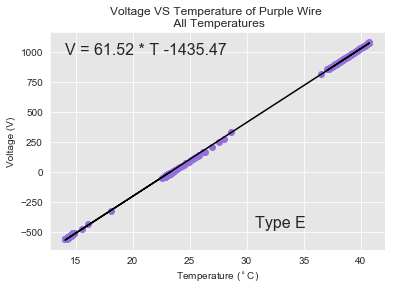

In [4]:
from scipy.stats import linregress
x = df['temp_2_Avg']
y=df['volt_2_Avg']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'V = '+str(round(m,2)) + ' *' + ' T '  + str(round(b,2)) 


#plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.scatter(x, y,color='mediumpurple')
plt.plot(x, reg_line, color="black")
plt.text(min(x),max(y)-100, equation, fontsize=16)
plt.title('Voltage VS Temperature of Purple Wire \n All Temperatures')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Voltage (V)')
plt.text(max(x)-10,min(y)+100, 'Type E', fontsize=16)

## Create plots for blue wire

Text(30.05,-263.3,'Type T')

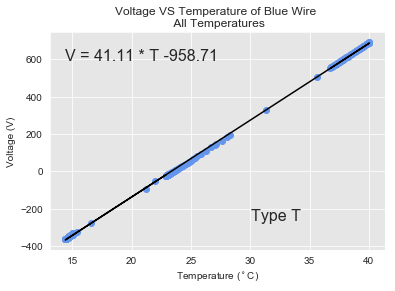

In [5]:
from scipy.stats import linregress
x = df['temp_3_Avg']
y=df['volt_3_Avg']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'V = '+str(round(m,2)) + ' *' + ' T '  + str(round(b,2)) 


#plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.scatter(x, y,color='cornflowerblue')
plt.plot(x, reg_line, color="black")
plt.text(min(x),max(y)-100, equation, fontsize=16)
plt.title('Voltage VS Temperature of Blue Wire \n All Temperatures')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Voltage (V)')
plt.text(max(x)-10,min(y)+100, 'Type T', fontsize=16)

## Uncomment this cell to view full df and check for minima/maxima

In [6]:
# n=5 # number of points to be checked before and after 
# # Find local peaks
# df['min'] = df.iloc[argrelextrema(df.temp_3_Avg.values, np.less_equal, order=n)[0]]['temp_3_Avg']
# df['max'] = df.iloc[argrelextrema(df.temp_3_Avg.values, np.greater_equal, order=n)[0]]['temp_3_Avg']

# # Plot results
# plt.scatter(df.index, df['min'], c='r')
# plt.scatter(df.index, df['max'], c='g')
# plt.plot(df.index, df['temp_3_Avg'])
# plt.show()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [7]:
col_names_blue=["time","bt_room","bt_cold","bt_hot",
           "bv_room","bv_cold","bv_hot"]
col_names_purple=["time","pt_room","pt_cold","pt_hot",
           "pv_room","pv_cold","pv_hot"]

## Seperate by temperatures

In [8]:
df_air_T=df.iloc[6:72,:]
df_cold_T=df.iloc[81:138,:]
df_hot_T=df.iloc[139:201,:]



# Purple plots

Text(0,0.5,'Voltage (V)')

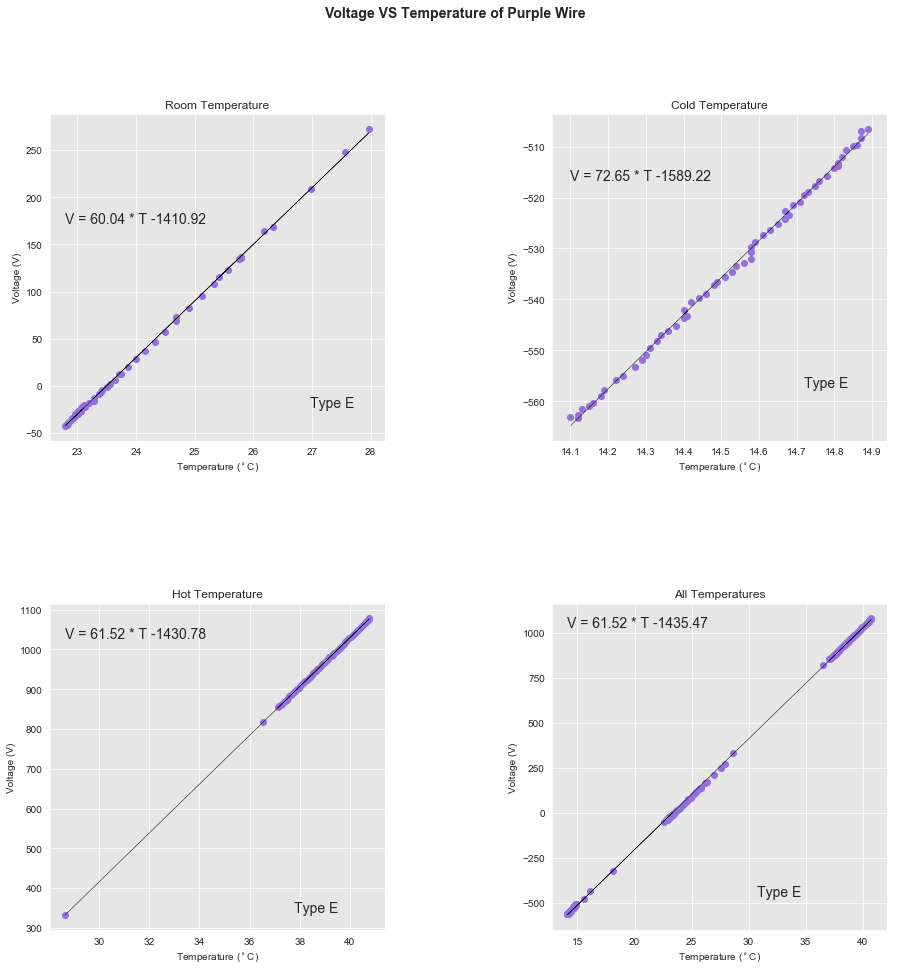

In [56]:
fig,axes = plt.subplots(2, 2,figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
fig.suptitle('Voltage VS Temperature of Purple Wire', fontsize=14, fontweight='bold')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#=============================== ROOM TEMP ======================================================
x = df_air_T['temp_2_Avg']
y=df_air_T['volt_2_Avg']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'V = '+str(round(m,2)) + ' *' + ' T '  + str(round(b,2)) 


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
axes[0, 0].scatter(x, y,color='mediumpurple',marker='o')
axes[0, 0].plot(x, reg_line, color="black",linewidth='0.5')
axes[0, 0].annotate(equation, xy=(min(x),max(y)-100), fontsize=14) 
axes[0, 0].annotate('Type E', xy=(max(x)-1,min(y)+20), fontsize=14)
axes[0, 0].set_title('Room Temperature')
axes[0, 0].set_xlabel('Temperature ($^\circ$C)')
axes[0, 0].set_ylabel('Voltage (V)')

#=============================== COLD TEMP ======================================================

x = df_cold_T['temp_2_Avg']
y=df_cold_T['volt_2_Avg']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'V = '+str(round(m,2)) + ' *' + ' T '  + str(round(b,2)) 


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
axes[0, 1].scatter(x, y,color='mediumpurple',marker='o')
axes[0, 1].plot(x, reg_line, color="black",linewidth='0.5')
axes[0, 1].annotate(equation, xy=(min(x),max(y)-10), fontsize=14) 
axes[0, 1].annotate('Type E', xy=(max(x)-0.17,min(y)+6), fontsize=14)
axes[0, 1].set_title('Cold Temperature')
axes[0, 1].set_xlabel('Temperature ($^\circ$C)')
axes[0, 1].set_ylabel('Voltage (V)')

#=============================== HOT TEMP ======================================================
x = df_hot_T['temp_2_Avg']
y=df_hot_T['volt_2_Avg']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'V = '+str(round(m,2)) + ' *' + ' T '  + str(round(b,2)) 


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
axes[1,0].scatter(x, y,color='mediumpurple',marker='o')
axes[1,0].plot(x, reg_line, color="black",linewidth='0.5')
axes[1,0].annotate(equation, xy=(min(x),max(y)-50), fontsize=14) 
axes[1,0].annotate('Type E', xy=(max(x)-3,min(y)+6), fontsize=14)
axes[1,0].set_title('Hot Temperature')
axes[1,0].set_xlabel('Temperature ($^\circ$C)')
axes[1,0].set_ylabel('Voltage (V)')

#=============================== ALL TEMP ======================================================
x = df['temp_2_Avg']
y=df['volt_2_Avg']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'V = '+str(round(m,2)) + ' *' + ' T '  + str(round(b,2)) 


axes[1,1].scatter(x, y,color='mediumpurple',marker='o')
axes[1,1].plot(x, reg_line, color="black",linewidth='0.5')
axes[1,1].annotate(equation, xy=(min(x),max(y)-50), fontsize=14) 
axes[1,1].annotate('Type E', xy=(max(x)-10,min(y)+100), fontsize=14)
axes[1,1].set_title('All Temperatures')
axes[1,1].set_xlabel('Temperature ($^\circ$C)')
axes[1,1].set_ylabel('Voltage (V)')